In [1]:
import os
import scipy


In [2]:
import os

def list_subfolders(folder_path):
    subfolders = [f for f in os.listdir(folder_path) if os.path.isdir(os.path.join(folder_path, f))]
    return subfolders, len(subfolders)

folder_path = './augment 8020'
subfolders, total_folders = list_subfolders(folder_path)
print("Total number of classes:", total_folders)
print("Subfolders in the classes:")
for subfolder in subfolders:
    print(subfolder)


Total number of classes: 28
Subfolders in the classes:
Akshay Kumar_
Alia Bhatt_
Amitabh Bachchan_
Andy Samberg_
Anushka Sharma_
Billie Eilish_
Brad Pitt_
Camila Cabello_
Charlize Theron_
Claire Holt_
Courtney Cox_
Dwayne Johnson_
Elizabeth Olsen_
Ellen Degeneres_
Henry Cavill_
Hrithik Roshan_
Hugh Jackman_
jeewan
Jessica Alba_
Lisa Kudrow_
Margot Robbie_
Natalie Portman_
Priyanka Chopra_
Roger Federer_
Tom Cruise_
Vijay Deverakonda_
Virat Kohli_
Zac Efron_


In [3]:
import os
import shutil
import random
import tensorflow as tf
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

# Function to list subfolders
def list_subfolders(folder_path):
    subfolders = [f for f in os.listdir(folder_path) if os.path.isdir(os.path.join(folder_path, f))]
    return subfolders, len(subfolders)

# Define root directory and paths for data splitting
root_dir = "./augment 8020"
train_dir = "./train80"
test_dir = "./test20"
train_ratio = 0.8

# Split data into train and test directories
for class_folder in os.listdir(root_dir):
    class_path = os.path.join(root_dir, class_folder)
    if os.path.isdir(class_path):
        train_class_dir = os.path.join(train_dir, class_folder)
        test_class_dir = os.path.join(test_dir, class_folder)
        os.makedirs(train_class_dir, exist_ok=True)
        os.makedirs(test_class_dir, exist_ok=True)
        images = os.listdir(class_path)
        random.shuffle(images)
        split_index = int(len(images) * train_ratio)
        train_images = images[:split_index]
        test_images = images[split_index:]
        for img in train_images:
            shutil.move(os.path.join(class_path, img), os.path.join(train_class_dir, img))
        for img in test_images:
            shutil.move(os.path.join(class_path, img), os.path.join(test_class_dir, img))

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dropout, Dense

# Define the model
model = Sequential([
    Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=(240, 240, 3)),
    Conv2D(filters=32, kernel_size=3, activation='relu'),
    MaxPool2D(pool_size=2, strides=2),
    Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'),
    Conv2D(filters=64, kernel_size=3, activation='relu'),
    MaxPool2D(pool_size=2, strides=2),
    Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'),
    Conv2D(filters=128, kernel_size=3, activation='relu'),
    MaxPool2D(pool_size=2, strides=2),
    Conv2D(filters=256, kernel_size=3, padding='same', activation='relu'),
    Conv2D(filters=256, kernel_size=3, activation='relu'),
    MaxPool2D(pool_size=2, strides=2),
    Conv2D(filters=512, kernel_size=3, padding='same', activation='relu'),
    Conv2D(filters=512, kernel_size=3, activation='relu'),
    MaxPool2D(pool_size=2, strides=2),
  #  Conv2D(filters=1028, kernel_size=3, padding='same', activation='relu'),
  #  Conv2D(filters=1028, kernel_size=3, activation='relu'),
    MaxPool2D(pool_size=2, strides=2),
    Flatten(),
    Dropout(0.25),
    Dense(units=256, activation='relu'),
    Dropout(0.25),
    Dense(units=128, activation='relu'),
    Dense(units=28, activation='softmax')
])

# Compile the model with a reduced learning rate
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(learning_rate=0.0001),  # Decreased learning rate
              metrics=['accuracy'])

# Load data using ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

batch_size = 32

train_generator = train_datagen.flow_from_directory(
    './train80',
    target_size=(240, 240),
    batch_size=batch_size,
    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
    './test20',
    target_size=(240, 240),
    batch_size=batch_size,
    class_mode='categorical')



Found 11057 images belonging to 28 classes.
Found 2779 images belonging to 28 classes.


In [4]:
# to stop model training at a curtain condition
from keras.callbacks import EarlyStopping

# Instantiate the EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, verbose=1, restore_best_weights=True)


In [5]:
# Train the model with adjusted parameters
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.n // train_generator.batch_size,
    epochs=50,
    validation_data=validation_generator,
    validation_steps=validation_generator.n // validation_generator.batch_size,
    callbacks=[early_stopping]
    )



Epoch 1/50
345/345 [==============================] - 193s 494ms/step - loss: 3.3054 - accuracy: 0.0468 - val_loss: 3.2884 - val_accuracy: 0.0465
Epoch 2/50
345/345 [==============================] - 127s 368ms/step - loss: 3.1123 - accuracy: 0.1043 - val_loss: 2.7662 - val_accuracy: 0.1922
Epoch 3/50
345/345 [==============================] - 127s 366ms/step - loss: 2.7394 - accuracy: 0.1918 - val_loss: 2.5150 - val_accuracy: 0.2464
Epoch 4/50
345/345 [==============================] - 127s 369ms/step - loss: 2.5043 - accuracy: 0.2551 - val_loss: 2.2379 - val_accuracy: 0.3234
Epoch 5/50
345/345 [==============================] - 128s 371ms/step - loss: 2.2507 - accuracy: 0.3116 - val_loss: 1.9312 - val_accuracy: 0.4044
Epoch 6/50
345/345 [==============================] - 127s 368ms/step - loss: 1.9596 - accuracy: 0.3915 - val_loss: 1.5691 - val_accuracy: 0.5200
Epoch 7/50
345/345 [==============================] - 127s 368ms/step - loss: 1.7167 - accuracy: 0.4590 - val_loss: 1.5078 -

In [6]:
# Save and evaluate the model
model.save('./model_0.h5')



Found 11057 images belonging to 28 classes.
Found 2779 images belonging to 28 classes.
346/346 [==============================] - 33s 95ms/step
Classification Report for Training Data:
                    precision    recall  f1-score   support

     Akshay Kumar_       1.00      1.00      1.00       240
       Alia Bhatt_       1.00      0.99      1.00       379
 Amitabh Bachchan_       1.00      1.00      1.00       355
     Andy Samberg_       1.00      1.00      1.00       441
   Anushka Sharma_       1.00      1.00      1.00       326
    Billie Eilish_       1.00      1.00      1.00       470
        Brad Pitt_       1.00      1.00      1.00       576
   Camila Cabello_       1.00      1.00      1.00       417
  Charlize Theron_       1.00      0.99      1.00       374
      Claire Holt_       1.00      1.00      1.00       460
     Courtney Cox_       1.00      1.00      1.00       384
   Dwayne Johnson_       1.00      1.00      1.00       292
  Elizabeth Olsen_       1.00     

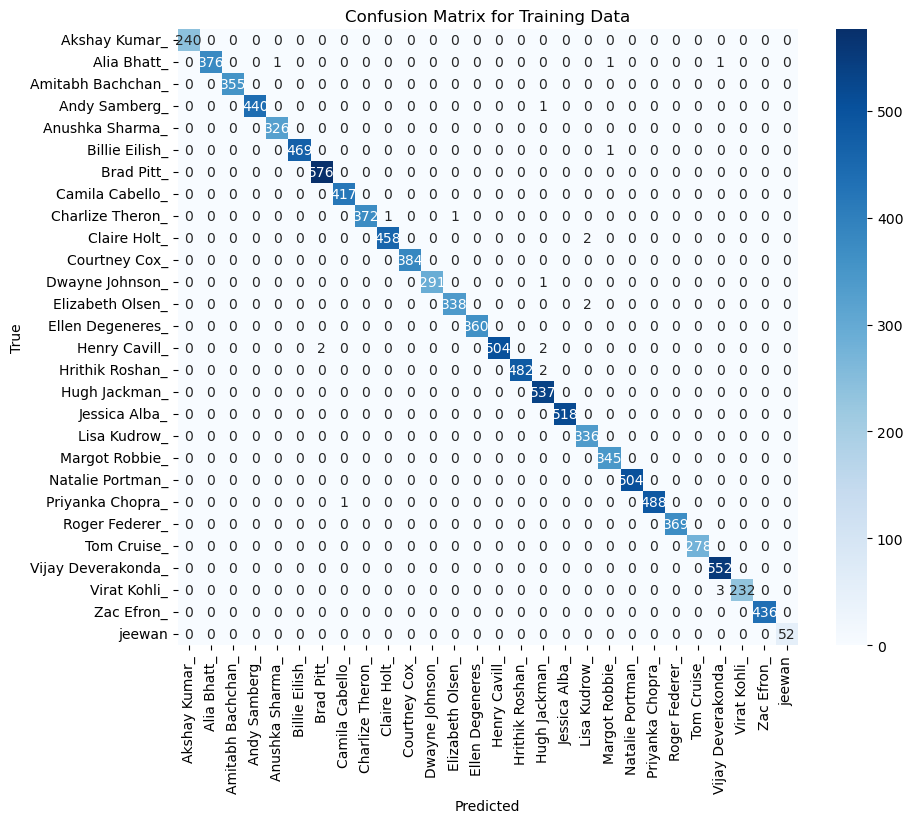

87/87 [==============================] - 8s 93ms/step
Classification Report for Test Data:
                    precision    recall  f1-score   support

     Akshay Kumar_       1.00      0.97      0.98        60
       Alia Bhatt_       0.99      0.99      0.99        95
 Amitabh Bachchan_       0.96      1.00      0.98        89
     Andy Samberg_       1.00      0.97      0.99       111
   Anushka Sharma_       0.98      0.96      0.97        82
    Billie Eilish_       0.99      0.97      0.98       118
        Brad Pitt_       0.98      0.99      0.98       144
   Camila Cabello_       0.96      1.00      0.98       105
  Charlize Theron_       1.00      0.94      0.97        94
      Claire Holt_       0.96      0.94      0.95       116
     Courtney Cox_       0.98      0.97      0.97        96
   Dwayne Johnson_       0.99      0.97      0.98        74
  Elizabeth Olsen_       0.98      0.94      0.96        86
  Ellen Degeneres_       1.00      1.00      1.00        90
     Hen

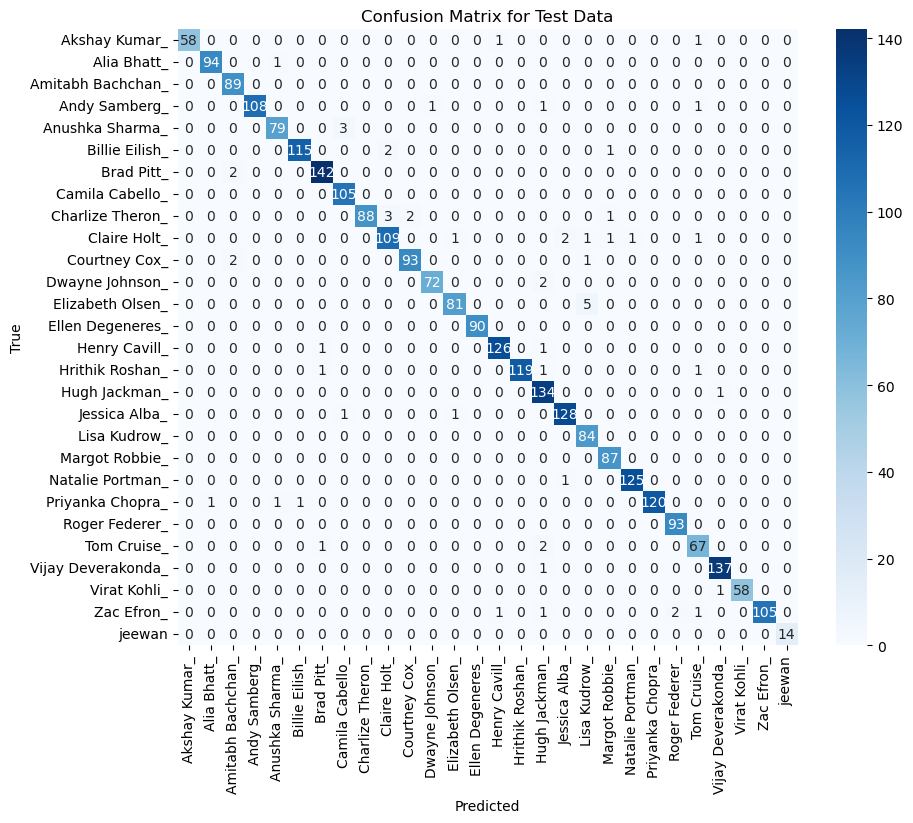

87/87 [==============================] - 9s 96ms/step - loss: 0.0818 - accuracy: 0.9788
Validation Accuracy: 97.88%
The variable 'history' is not defined. Make sure you have the training history available.


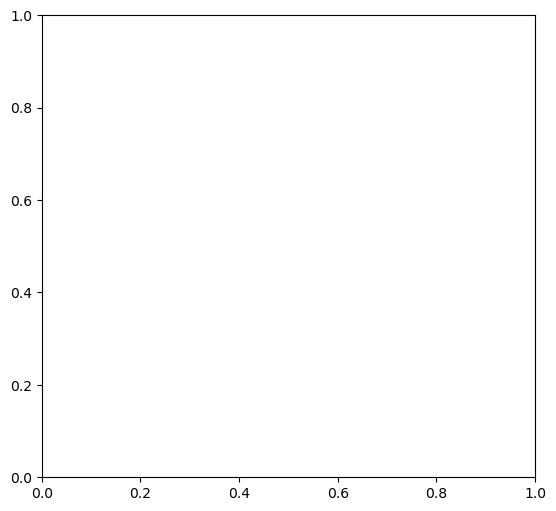

In [2]:
import os
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the saved model
model_path = './model_0.h5'
model = load_model(model_path)

# Define the ImageDataGenerator for training and test data
datagen = ImageDataGenerator(rescale=1./255)

# Define the training generator
train_generator = datagen.flow_from_directory(
    './train80',
    target_size=(240, 240),
    batch_size=32,
    class_mode='categorical',
    shuffle=False  # Important to keep the order of images for evaluation
)

# Define the validation generator
validation_generator = datagen.flow_from_directory(
    './test20',
    target_size=(240, 240),
    batch_size=32,
    class_mode='categorical',
    shuffle=False  # Important to keep the order of images for evaluation
)

# Get the class labels from the generator
class_labels = list(train_generator.class_indices.keys())

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, labels, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(title)
    plt.show()

# Function to evaluate and print classification report and confusion matrix
def evaluate_model(generator, dataset_type):
    generator.reset()
    Y_pred = model.predict(generator, steps=generator.n // generator.batch_size + 1)
    y_pred = np.argmax(Y_pred, axis=1)
    y_true = generator.classes
    print(f"Classification Report for {dataset_type} Data:")
    print(classification_report(y_true, y_pred, target_names=class_labels))
    plot_confusion_matrix(y_true, y_pred, class_labels, f"Confusion Matrix for {dataset_type} Data")

# Evaluate and plot confusion matrix for training data
evaluate_model(train_generator, 'Training')

# Evaluate and plot confusion matrix for test data
evaluate_model(validation_generator, 'Test')

# Evaluate the model on the test data
evaluation = model.evaluate(validation_generator)
accuracy = evaluation[1] * 100
print("Validation Accuracy: {:.2f}%".format(accuracy))

# Assuming you have history from the previous training session.
# If you don't have history saved, you will need to save it during training.
# For now, we'll assume history is available.

# Plot accuracy
try:
    plt.figure(figsize=(14, 6))

    # Plot training & validation accuracy values
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Training and Validation Accuracy Over Epochs')
    plt.legend()
    plt.grid(True)

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss Over Epochs')
    plt.legend()
    plt.grid(True)

    # Show the plots
    plt.tight_layout()
    plt.show()
except NameError:
    print("The variable 'history' is not defined. Make sure you have the training history available.")

plt.show()


In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dropout, Dense
from tensorflow.keras.optimizers import Adam

# Define the model
model = Sequential([
    Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=(240, 240, 3)),
    Conv2D(filters=32, kernel_size=3, activation='relu'),
    MaxPool2D(pool_size=2, strides=2),
    Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'),
    Conv2D(filters=64, kernel_size=3, activation='relu'),
    MaxPool2D(pool_size=2, strides=2),
    Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'),
    Conv2D(filters=128, kernel_size=3, activation='relu'),
    MaxPool2D(pool_size=2, strides=2),
    Conv2D(filters=256, kernel_size=3, padding='same', activation='relu'),
    Conv2D(filters=256, kernel_size=3, activation='relu'),
    MaxPool2D(pool_size=2, strides=2),
    Conv2D(filters=512, kernel_size=3, padding='same', activation='relu'),
    Conv2D(filters=512, kernel_size=3, activation='relu'),
    MaxPool2D(pool_size=2, strides=2),
    # Conv2D(filters=1028, kernel_size=3, padding='same', activation='relu'),
    # Conv2D(filters=1028, kernel_size=3, activation='relu'),
    MaxPool2D(pool_size=2, strides=2),
    Flatten(),
    Dropout(0.25),
    Dense(units=256, activation='relu'),
    Dropout(0.25),
    Dense(units=128, activation='relu'),
    Dense(units=28, activation='softmax')
])

# Compile the model with a reduced learning rate
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(learning_rate=0.0001),  # Decreased learning rate
              metrics=['accuracy'])

# Print the model architecture
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 240, 240, 32)      896       
                                                                 
 conv2d_11 (Conv2D)          (None, 238, 238, 32)      9248      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 119, 119, 32)     0         
 2D)                                                             
                                                                 
 conv2d_12 (Conv2D)          (None, 119, 119, 64)      18496     
                                                                 
 conv2d_13 (Conv2D)          (None, 117, 117, 64)      36928     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 58, 58, 64)       0         
 2D)                                                  